# Cleaning the NHIS Sleep Data Set and Dealing with NaN Values

In [1]:
import numpy as np
import pandas as pd

In [4]:
# Import the dataset

nhis = pd.read_csv('NHIS_2007.csv')

# Let's look at the dataset info
nhis.info()    #off the bat we can tell that the sleep data is wrong because it is an 'object' and that the sex col should be a boolea

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 9 columns):
HHX       4785 non-null int64
FMX       4785 non-null int64
FPX       4785 non-null int64
SEX       4785 non-null int64
BMI       4785 non-null float64
SLEEP     4785 non-null object
educ      4785 non-null int64
height    4785 non-null int64
weight    4785 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 336.5+ KB


Notice that the 'SLEEP' column is an object when it should be numeric.

In [5]:
# Let's see what the data looks like

nhis.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,?,13,66,168


The question marks in SLEEP are keeping the column from being numeric. 

Let's fix the problem of SLEEP being a column of objects by replacing 
the ?'s with NaN's and convert the column to numeric

In [8]:
# Replace ?'s with NaN's
nhis.replace('?', np.nan, inplace = True)# .replace in pandas replaces everthing in the table of a certain value to another thing

# Convert the items in SLEEP to numeric 
nhis['SLEEP'] = pd.to_numeric(nhis['SLEEP'])

nhis.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8.0,16,74,260
1,20,1,1,1,26.54,7.0,14,70,185
2,69,1,2,2,32.13,7.0,9,61,170
3,87,1,1,1,26.62,8.0,14,68,175
4,88,1,1,2,27.13,NaN,13,66,168


In [9]:
# Make sure we fixed the problem

nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 9 columns):
HHX       4785 non-null int64
FMX       4785 non-null int64
FPX       4785 non-null int64
SEX       4785 non-null int64
BMI       4785 non-null float64
SLEEP     4781 non-null float64
educ      4785 non-null int64
height    4785 non-null int64
weight    4785 non-null int64
dtypes: float64(2), int64(7)
memory usage: 336.5 KB


In [10]:
# Let's look at the stats for each column

nhis.describe()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
count,4785.000000,4785.000000,4785.000000,4785.000000,4785.000000,4781.000000,4785.000000,4785.000000,4785.000000
mean,27009.074190,1.019227,1.358621,1.548589,31.730665,9.508262,14.248903,69.578265,266.235737
std,15576.508793,0.188636,0.601803,0.497685,17.658336,14.738224,9.025264,9.367217,262.076677
min,16.000000,1.000000,1.000000,1.000000,12.910000,3.000000,0.000000,59.000000,100.000000
25%,13404.000000,1.000000,1.000000,1.000000,23.630000,6.000000,12.000000,64.000000,149.000000
50%,27527.000000,1.000000,1.000000,2.000000,26.970000,7.000000,13.000000,67.000000,175.000000
75%,40192.000000,1.000000,2.000000,2.000000,31.510000,8.000000,16.000000,71.000000,215.000000
max,53955.000000,6.000000,8.000000,2.000000,99.990000,99.000000,99.000000,99.000000,999.000000


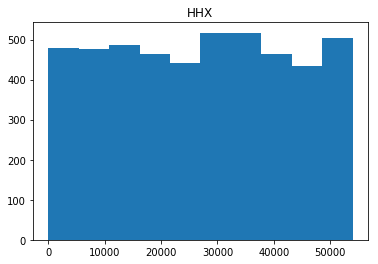

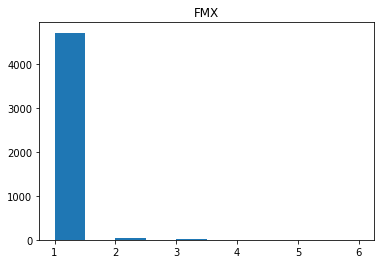

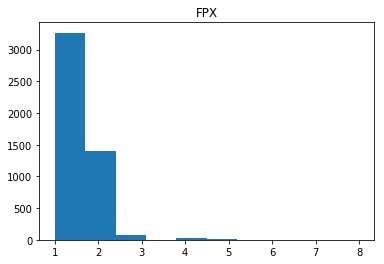

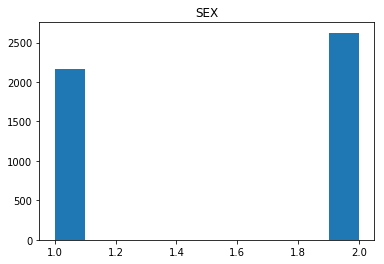

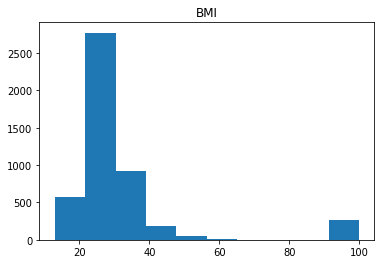

C:\Users\Trap Machine\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Trap Machine\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


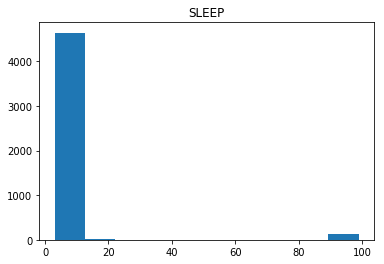

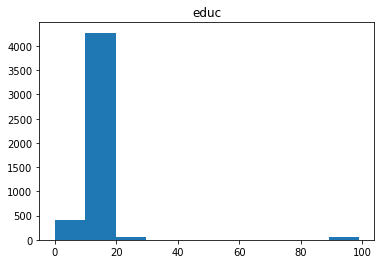

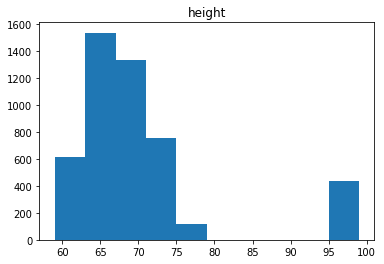

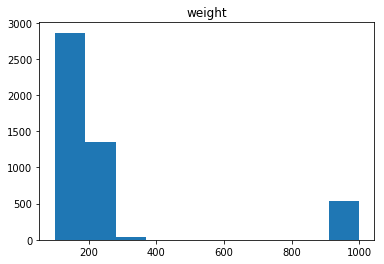

In [11]:
import matplotlib.pyplot as plt

# plotting all of the histograms
for col in nhis:
    plt.hist(nhis[col], range = [min(nhis[col]), max(nhis[col])])
    plt.title(col)
    plt.show()

Notice how there are some values in the histograms that don't seem to belong with the rest of the data. These are likely incorrect values.

C:\Users\Trap Machine\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Trap Machine\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


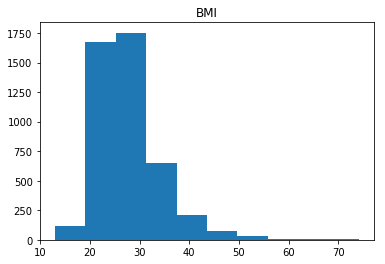

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
count,4785.000000,4785.000000,4785.000000,4785.000000,4519.000000,4781.000000,4785.000000,4785.000000,4785.000000
mean,27009.074190,1.019227,1.358621,1.548589,27.712744,9.508262,14.248903,69.578265,266.235737
std,15576.508793,0.188636,0.601803,0.497685,6.301324,14.738224,9.025264,9.367217,262.076677
min,16.000000,1.000000,1.000000,1.000000,12.910000,3.000000,0.000000,59.000000,100.000000
25%,13404.000000,1.000000,1.000000,1.000000,23.440000,6.000000,12.000000,64.000000,149.000000
50%,27527.000000,1.000000,1.000000,2.000000,26.560000,7.000000,13.000000,67.000000,175.000000
75%,40192.000000,1.000000,2.000000,2.000000,30.520000,8.000000,16.000000,71.000000,215.000000
max,53955.000000,6.000000,8.000000,2.000000,74.230000,99.000000,99.000000,99.000000,999.000000


In [12]:
# Let's fix the errant values in BMI

# Use the np.where() function to convert all of the values in BMI that are greater than 80 to NaN values
nhis['BMI'] = np.where(nhis['BMI'] > 80, np.nan, nhis['BMI'])

# Plot the histogram
plt.hist(nhis['BMI'], range = [min(nhis['BMI']), max(nhis['BMI'])])
plt.title('BMI')
plt.show()
nhis.describe()

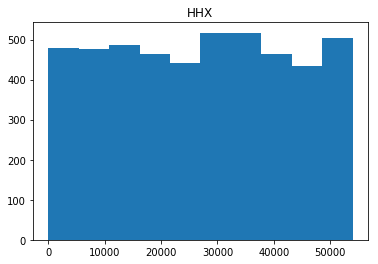

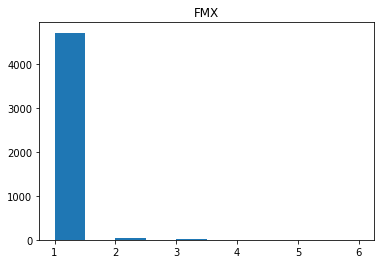

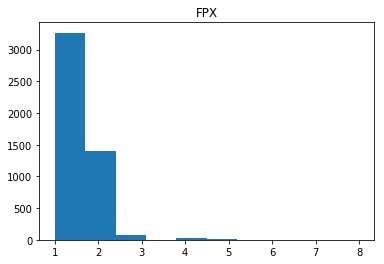

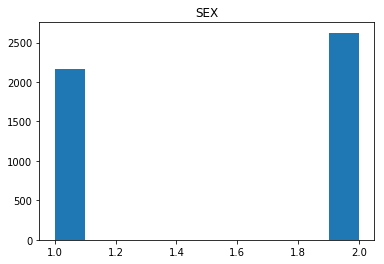

C:\Users\Trap Machine\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Trap Machine\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


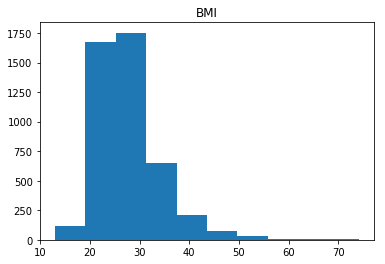

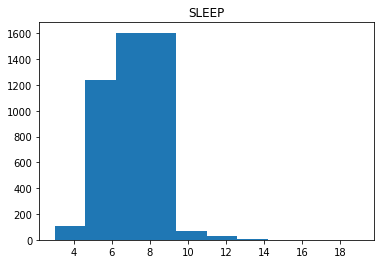

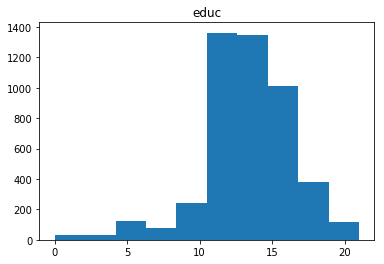

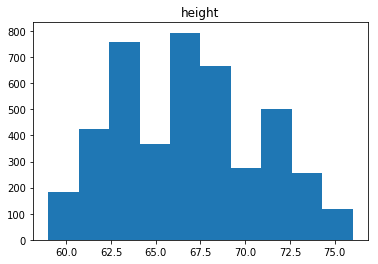

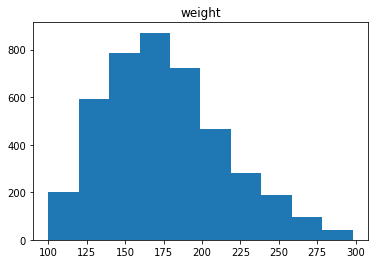

In [13]:
# Let's fix the rest of the columns with errant values

nhis['SLEEP'] = np.where(nhis['SLEEP'] > 24, np.nan, nhis['SLEEP'])
nhis['educ'] = np.where(nhis['educ'] > 40, np.nan, nhis['educ'])
nhis['height'] = np.where(nhis['height'] > 80, np.nan, nhis['height'])
nhis['weight'] = np.where(nhis['weight'] > 400, np.nan, nhis['weight'])


# Let's look at the histograms again to make sure that did things correctly
for col in nhis:
    plt.hist(nhis[col], range = [min(nhis[col]), max(nhis[col])])
    plt.title(col)
    plt.show()

Another thing to notice from the data is that there is a male/female column which is represented by numbers. Let's make that column categorical with identifiers "F" and "M".

Our first problem is figuring out which values coorespond to male, and which coorespond to female. For that, Let's make a scatter plot with SEX and weight with the assumption that men weigh more on average than females.

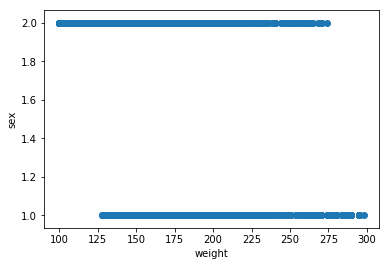

In [15]:
plt.scatter(x = nhis['weight'], y = nhis['SEX'])
plt.ylabel('sex')
plt.xlabel('weight')
plt.show()

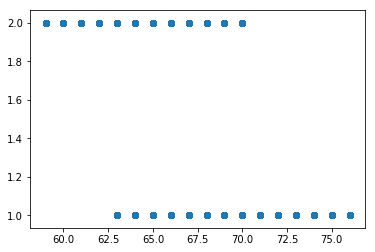

In [16]:
plt.scatter(x = nhis['height'], y = nhis['SEX'])
plt.show()

Based on the plot, higher values seem to coorespond to females, and the higher values seem to coorespond to males.

Using that knowlege, Let's turn all of the values in the SEX collumn that are higher than 1.5 equal to the string "F", and the values below 1.5 equal to the string "M".

In [19]:
nhis['SEX'] = np.where(nhis['SEX'] == 1, 'M', 'F')
nhis.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,F,33.36,8.0,16.0,74.0,260.0
1,20,1,1,F,26.54,7.0,14.0,70.0,185.0
2,69,1,2,F,32.13,7.0,9.0,61.0,170.0
3,87,1,1,F,26.62,8.0,14.0,68.0,175.0
4,88,1,1,F,27.13,NaN,13.0,66.0,168.0


In [21]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4785 entries, 0 to 4784
Data columns (total 9 columns):
HHX       4785 non-null int64
FMX       4785 non-null int64
FPX       4785 non-null int64
SEX       4785 non-null object
BMI       4519 non-null float64
SLEEP     4653 non-null float64
educ      4736 non-null float64
height    4347 non-null float64
weight    4249 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 336.5+ KB


### Dealing with the missing (NaN) values

There are a few ways in which you can deal with missing data:

##### 1\. Removing the rows with NaN values
    
This is only really valid when a relatively small postion of your dataset contains NaN's. It is never ideal to lose data points.
    
##### 2\. Removing the columns with NaN values
    
If only one or two non-essential columns contain all of the NaN velues, it can sometimes be effective to just remove those columns from the data inorder to save the others.

##### 3\. Imputation

Imputation is something that you could learn about for an entire semester (at least), but its basic definition is the replacement of values based on some estimation. There are different types of imputation: simple/single imputation, and multiple imputation. Simple imputation uses a single estimate to guess what a missing value should be. Examples of this are overall mean imputation, k-nearest-neighbors imputation, and linear regression. Multiple imputation uses multiple estimates to guess what the missing value should be. Multiple imputation methods are almost always more effective but are also far more complicated. A commonly used method for multiple imputation is MICE imputation which I encourage you to look up if you are interested.